# Import and preprocessing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras import regularizers
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/datasets/dataset.csv', header=None, names=["artist", "song", "genre", "tokens"])

def to_list(x):
    return x[1:-1].split(',')

def unison_shuffled_copies(a, b):
    assert a.shape[0] == b.shape[0]
    p = np.random.permutation(a.shape[0])
    return a[p], b[p]

def dummy_fun(x):
    return x

df['tokens'] = df['tokens'].apply(to_list)

data = df.values

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

X = tfidf.fit_transform(data[:,3])
Y = data[:, 2]

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
X_train = X[:5200]
# X_valid = X[4800:5500]
X_test = X[5200:]

Y_train = Y[:5200]
# Y_valid = Y[4800:5500]
Y_test = Y[5200:]

# Neural Network

In [0]:
seed = 7
np.random.seed(seed)

INPUT_SIZE = X.shape[1]

def baseline_model():
	model = Sequential()
	model.add(Dense(100, input_dim=INPUT_SIZE, activation='relu'))
	model.add(Dropout(.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dropout(.5))
	model.add(Dense(7, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = baseline_model()
history = model.fit(X_train, Y_train,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2,
                    shuffle=True,
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

# estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=20, verbose=0)
# kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# results = cross_val_score(estimator, X, dummy_y, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Train on 4160 samples, validate on 1040 samples
Epoch 1/10
4160/4160 [==============================] - 62s 15ms/step - loss: 1.5807 - acc: 0.3942 - val_loss: 0.9067 - val_acc: 0.8058
Epoch 2/10
4160/4160 [==============================] - 60s 14ms/step - loss: 1.0151 - acc: 0.6457 - val_loss: 0.5794 - val_acc: 0.8279
Epoch 3/10
4160/4160 [==============================] - 61s 15ms/step - loss: 0.6729 - acc: 0.7772 - val_loss: 0.5940 - val_acc: 0.8163
Epoch 4/10
4160/4160 [==============================] - 60s 14ms/step - loss: 0.5117 - acc: 0.8351 - val_loss: 0.6750 - val_acc: 0.8192
Epoch 5/10
4160/4160 [==============================] - 60s 14ms/step - loss: 0.3875 - acc: 0.8793 - val_loss: 0.6734 - val_acc: 0.8231
Epoch 6/10
4160/4160 [==============================] - 60s 14ms/step - loss: 0.3435 - acc: 0.8897 - val_loss: 0.7338 - val_acc: 0.8202
Epoch 7/10
4160/4160 [==============================] - 60s 14ms/step - loss: 0.2996 - acc: 0.9087 - val_loss: 0.8134 - val_acc: 0.8144


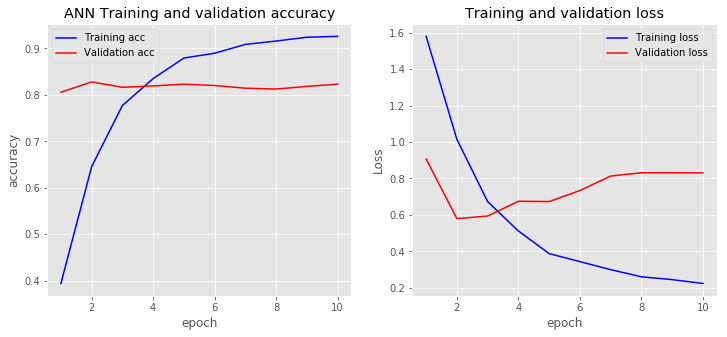

In [0]:

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('ANN Training and Validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

# Convolutional Neural Network

In [0]:
def cnn_model():
	model = Sequential()
	model.add(Conv1D(512, 5,input_shape=(1, INPUT_SIZE)))
	model.add(Dense(36, activation='relu'))
	model.add(Dropout(.5))
	model.add(Dense(36, activation='relu'))
	model.add(Dropout(.5))
	model.add(Dense(7, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = baseline_model()
history = model.fit(X_train, Y_train,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2,
                    shuffle=True,
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Train on 4160 samples, validate on 1040 samples
Epoch 1/10
4160/4160 [==============================] - 65s 16ms/step - loss: 1.5671 - acc: 0.4014 - val_loss: 0.9802 - val_acc: 0.8337
Epoch 2/10
4160/4160 [==============================] - 62s 15ms/step - loss: 0.9952 - acc: 0.6447 - val_loss: 0.7005 - val_acc: 0.8096
Epoch 3/10
4160/4160 [==============================] - 62s 15ms/step - loss: 0.6524 - acc: 0.7752 - val_loss: 0.5755 - val_acc: 0.8346
Epoch 4/10
4160/4160 [==============================] - 62s 15ms/step - loss: 0.4979 - acc: 0.8329 - val_loss: 0.6131 - val_acc: 0.8260
Epoch 5/10
4160/4160 [==============================] - 62s 15ms/step - loss: 0.4138 - acc: 0.8683 - val_loss: 0.7119 - val_acc: 0.8048
Epoch 6/10
4160/4160 [==============================] - 62s 15ms/step - loss: 0.3531 - acc: 0.8937 - val_loss: 0.6994 - val_acc: 0.8250
Epoch 7/10
4160/4160 [==============================] - 62s 15ms/step - loss: 0.2966 - acc: 0.9058 - val_loss: 0.7597 - val_acc: 0.8154


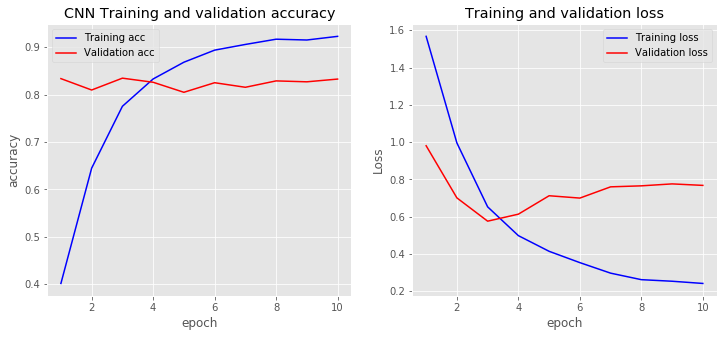

In [0]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('CNN Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)